# **Tarefa 5.1 - Pré-processamento de um conjunto de dados** | *Lucas Omar*

**1. Faça a leitura do arquivo "Churn_Modelling_2.csv" disponível na pasta "Churn" e armazene numa variável como um dataframe;**

In [14]:
import io
import requests
import pandas as pd

df_churn_url = 'https://raw.githubusercontent.com/malegopc/DSBD/main/Datasets/Churn/Churn_Modelling_2.csv'
df_churn_csv = requests.get(df_churn_url).content
df_churn_dataset = pd.read_csv(io.StringIO(df_churn_csv.decode('utf-8')))
df_churn = pd.DataFrame(df_churn_dataset)
df_churn.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1.0,1,1.0,101348.88,1
1,608,Spain,Female,41,1,83807.86,1.0,0,1.0,112542.58,0
2,502,France,Female,42,8,159660.80,3.0,1,0.0,113931.57,1
3,699,France,Female,39,1,0.00,2.0,0,0.0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1.0,1,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2.0,1,0.0,96270.64,0
9996,516,France,Male,35,10,57369.61,1.0,1,1.0,101699.77,0
9997,709,France,Female,36,7,0.00,1.0,0,1.0,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2.0,1,0.0,92888.52,1


**2. Elimine instâncias (linhas) com dados ausentes para a variável "IsActiveMember".**

In [15]:
df_churn.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts      10
HasCrCard           0
IsActiveMember     14
EstimatedSalary     0
Exited              0
dtype: int64

In [16]:
df_churn.dropna(subset=['IsActiveMember'], inplace = True)
df_churn.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts      10
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

**3. Faça a imputação dos dados ausentes para a variável "NumOfProducts" utilizando a média da variável.**

In [17]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
df_churn[['NumOfProducts']] = imputer.fit_transform(df_churn[['NumOfProducts']].values)
df_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df_churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

**4. Crie uma variável (array) X que contenha apenas os valores dos atributos/colunas de "CreditScore" a "EstimatedSalary" utilizando a função "iloc" do Pandas. Em outras palavras, crie uma variável X que receba o dataframe inteiro exceto as 3 primeiras colunas e a última. Observe que as 3 primeiras colunas "RowNumber", "CustomerId" e "Surname" não são importantes e devem ser descartadas. E a última coluna ("Exited") será a variável destino ("target" ou saída) que será criada no próximo passo;**

In [19]:
df_churn.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1.0,1,1.0,101348.88,1


In [24]:
X = df_churn.iloc[:,3:13].values
print(X)

[[619 'France' 'Female' ... 1 1.0 101348.88]
 [608 'Spain' 'Female' ... 0 1.0 112542.58]
 [502 'France' 'Female' ... 1 0.0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1.0 42085.58]
 [772 'Germany' 'Male' ... 1 0.0 92888.52]
 [792 'France' 'Female' ... 1 0.0 38190.78]]


**5. Crie uma variável (array) y que contenha apenas a última coluna  ("Exited"). Esta é a variável destino ("target" ou saída);**

In [25]:
y = df_churn.iloc[:,13]
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9986, dtype: int64


**6. Codifique a coluna/variável categórica "Geography" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # cria objeto
le.fit(X[:,1]) # ajusta na variável de entrada
X[:,1] = le.transform(X[:,1]) # aplica a transformação na variável de entrada
print(X)

[[619 0 'Female' ... 1 1.0 101348.88]
 [608 2 'Female' ... 0 1.0 112542.58]
 [502 0 'Female' ... 1 0.0 113931.57]
 ...
 [709 0 'Female' ... 0 1.0 42085.58]
 [772 1 'Male' ... 1 0.0 92888.52]
 [792 0 'Female' ... 1 0.0 38190.78]]


**7. Codifique a coluna/variável categórica "Gender" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;**

In [ ]:
le = LabelEncoder() # cria objeto
le.fit(X[:,2]) # ajusta na variável de entrada
X[:,2] = le.transform(X[:,2]) # aplica a transformação na variável de entrada
print(X)

[[619 0 0 ... 1 1.0 101348.88]
 [608 2 0 ... 0 1.0 112542.58]
 [502 0 0 ... 1 0.0 113931.57]
 ...
 [709 0 0 ... 0 1.0 42085.58]
 [772 1 1 ... 1 0.0 92888.52]
 [792 0 0 ... 1 0.0 38190.78]]


In [ ]:
X.shape

(9986, 10)

**8. Após executar o passo 6, transforme os dados da variável  Geography" para a forma binária utilizando a classe OneHotEncoder da biblioteca scikit-learn eliminando redundância, ou seja, aplicando a codificação de variáveis dummy. Observe que há apenas 3 países (categorias) diferentes. Atenção: esse talvez seja o passo mais difícil da tarefa. Você deve transformar o resultado da variável/coluna "Geography" obtido no passo 6 para o formato binário (one-hot) de modo que fique representado por apenas duas colunas (de 0s e 1s). Além disso, essas duas novas colunas devem permanecer na mesma variável X. Dica: verifique a utilização da função make_column_transformer (Links para um site externo.) da biblioteca scikit-learn;**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

enc = OneHotEncoder(drop = 'first', sparse = False) # cria objeto com argumento sparse = False para retornar uma matriz e remover 1o. recurso
ct = make_column_transformer((enc,[1]),remainder = 'passthrough')
X = ct.fit_transform(X)

In [ ]:
X

array([[0.0, 0.0, 619, ..., 1, 1.0, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1.0, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0.0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1.0, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0.0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0.0, 38190.78]], dtype=object)

In [ ]:
X.shape

(9986, 11)

**9. Divida os variáveis X e y em dados de treino e de teste utilizando o método "train_test_split", gerando as variáveis X_train, X_test, y_train e y_test. Você define a proporção de dados de treino e de teste;**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((7489, 11), (2497, 11), (7489,), (2497,))

**10. Faça a padronização dos dados das variáveis X_train e X_test utilizando a classe StandardScaler do scikit-learn;**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() #cria objeto
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler() #cria objeto
# X_train = sc.fit_transform(X_train)
# print(X_train)

[[0.         0.         0.322      ... 1.         0.         0.71998516]
 [0.         1.         0.31       ... 1.         0.         0.97701205]
 [0.         0.         0.382      ... 0.         0.         0.43085285]
 ...
 [1.         0.         0.642      ... 0.         1.         0.17332855]
 [1.         0.         0.342      ... 1.         1.         0.54677697]
 [0.         0.         0.494      ... 1.         1.         0.26156338]]
[[0.         0.         0.678      ... 1.         0.         0.980598  ]
 [0.         1.         0.294      ... 1.         1.         0.82414601]
 [1.         0.         0.866      ... 1.         0.         0.01069422]
 ...
 [0.         0.         0.52       ... 1.         1.         0.74802624]
 [0.         0.         0.532      ... 1.         1.         0.08844795]
 [0.         0.         0.674      ... 1.         0.         0.13419617]]


# **Tarefa 5.2 - Aplicação de diferentes algoritmos de AM numa tarefa de predição (classificação) Churn - Churn_Modelling** | *Lucas Omar*

**1. Você deve aplicar os seguintes algoritmos de AM:**
* **Regressão Logística**
* **KNN - K-Nearest Neighbors (k-vizinhos mais próximos)**
* **SVM - Support Vector Machines (Máquinas de Vetores de Suporte)**
* **Random Forest**

Taxa de acerto =  80.42 %
Matriz de confusão:


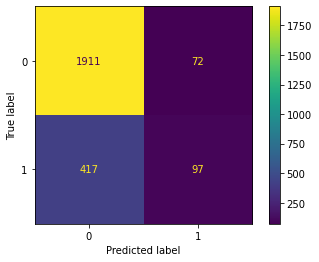

In [ ]:
#######################
# Regressão Logística #
#######################

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear') # liblinear => conjuntos pequenos
logreg.fit(X_train,y_train)
classificacoes_logreg = logreg.predict(X_test)

acertos_LogReg = metrics.accuracy_score(y_test,classificacoes_logreg)
print('Taxa de acerto = ',round(acertos_LogReg*100,2),"%")

print('Matriz de confusão:')
cm_logreg = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

Taxa de acerto =  80.74 %
Matriz de confusão:


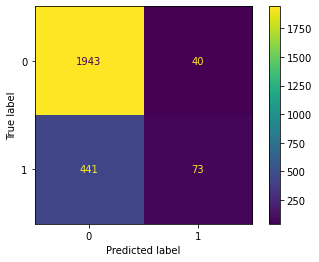

In [ ]:
########################################################
# KNN - K-Nearest Neighbors (k-vizinhos mais próximos) #
########################################################
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20) 
knn.fit(X_train,y_train)
classificacoes_knn = knn.predict(X_test)

acertos_knn = metrics.accuracy_score(y_test,classificacoes_knn)
print('Taxa de acerto = ',round(acertos_knn*100,2),"%")

print('Matriz de confusão:')
cm_knn = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

Taxa de acerto =  83.62 %
Matriz de confusão:


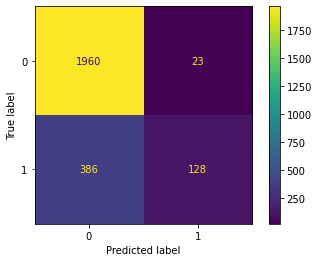

In [ ]:
###################################################################
# SVM - Support Vector Machines (Máquinas de Vetores de Suporte ) #
###################################################################
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train, y_train)
classificacoes_svm = svm.predict(X_test)

acertos_svm = metrics.accuracy_score(y_test, classificacoes_svm)
print('Taxa de acerto = ',round(acertos_svm*100,2),"%")

print('Matriz de confusão:')
cm_svm = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)

Taxa de acerto =  84.94 %
Matriz de confusão:


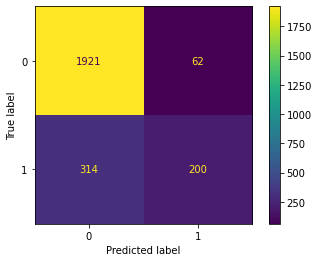

In [ ]:
#################
# Random Forest #
#################
from sklearn.ensemble import RandomForestClassifier

# n_estimators é o número de arvores de decisao que ele vai implementar
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)
classificacoes_rf = rf.predict(X_test)

acertos_rf = metrics.accuracy_score(y_test, classificacoes_rf)
print('Taxa de acerto = ',round(acertos_rf*100,2),"%")

print('Matriz de confusão:')
cm_rf = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

# **Tarefa 5.4 - Projeto: predição Churn - Churn_Modelling** | *Lucas Omar*

**1. Os 3 primeiros atributos devem ser excluídos (RowNumber, CustomerId e Surname)**

[*>> Feito nesta Célula*](https://colab.research.google.com/drive/1COxYe-w-MAbLTs2-OWTFDx5agcC9xyeg?authuser=1#scrollTo=8zKyD8esevJK&line=9&uniqifier=1)

**2. Os dados devem ser pré-processados (recuperar o que foi feito na Tarefa 5.1)**

[*>> Feito nesta Célula*](https://colab.research.google.com/drive/1COxYe-w-MAbLTs2-OWTFDx5agcC9xyeg?authuser=1#scrollTo=_QysirvzGiDA)


**3. Divida o conjunto de dados em treino (75%) e teste (25%);**

[*>> Feito nesta Célula*](https://colab.research.google.com/drive/1COxYe-w-MAbLTs2-OWTFDx5agcC9xyeg?authuser=1#scrollTo=exKQLpgU0pKT)

## **Predição**

In [ ]:
####################################
# Criação do modelo de rede neural #
####################################

from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import cross_val_score

model = Sequential()
# 1a. camada escondida com 32 neurônios - 11 entradas (atributos)
model.add(Dense(32, input_dim=11, kernel_initializer = 'he_uniform', activation='relu'))
# 2a. camada escondida com 16 neurônios
model.add(Dense(16, kernel_initializer = 'he_uniform', activation='relu'))
# Camada de saída com 01 neurônio - Classificação binária (Democrat or Republican)
model.add(Dense(1, activation='sigmoid'))
# Sumário do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                384       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
####################
# Compila o modelo #
####################

from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.25), loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
###################
# Treina o modelo #
###################

history = model.fit(X_train, y_train, epochs=100, batch_size = 8, validation_data=(X_test, y_test))

**4. Mostrar os gráficos da função Loss e de Acurácia para os dados de treinamento e teste (validação);**

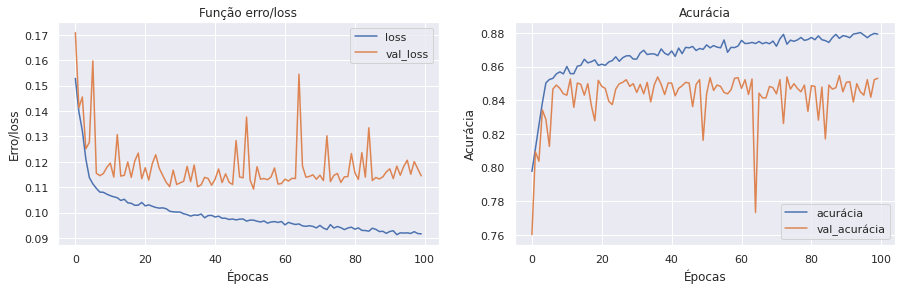

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # GRAPHICS GENERATION

sns.set(rc={'figure.figsize':(15,9)})

#######################################
# Análise da função loss (erro/perda) #
#######################################
plt.subplot(2,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Épocas")
plt.ylabel('Erro/loss')
plt.title('Função erro/loss')
plt.legend(['loss', 'val_loss'])

###############################################
# Análise da métrica de desempenho (acurácia) #
###############################################
plt.subplot(2,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Épocas")
plt.ylabel('Acurácia')
plt.title('Acurácia')
plt.legend(['acurácia', 'val_acurácia'])
plt.show()

**5. Calcule também a matriz de confusão para avaliar o desempenho do modelo.**

In [ ]:
#######################################################################################
# Classifica os dados de teste + Calcula a matriz de confusão sobre os dados de teste #
#######################################################################################
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1926   57]
 [ 310  204]]
